In [43]:
!pip install matplotlib

In [44]:
!pip install pandas

In [45]:
!pip install scikit-learn

In [46]:
!pip install seaborn

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
data = pd.read_csv('chennai Flood Dataset.csv')
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,CHENNAI,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,CHENNAI,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,CHENNAI,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,CHENNAI,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,CHENNAI,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,CHENNAI,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,CHENNAI,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,CHENNAI,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,CHENNAI,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [34]:
data.apply(lambda x:sum(x.isnull()), axis=0)


SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [35]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)


In [36]:
data.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,CHENNAI,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,CHENNAI,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,CHENNAI,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,CHENNAI,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,CHENNAI,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [37]:
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [38]:
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

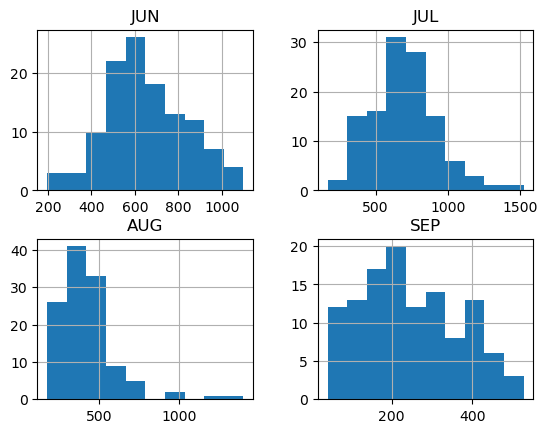

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [40]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [41]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
71,1972,2.6,7.5,2.5,87.5,436.0,401.8,714.4,294.9,185.7,351.5,140.5,114.3
90,1991,10.9,4.4,33.2,97.0,113.4,1096.1,905.5,465.5,48.5,307.8,99.9,2.3
83,1984,36.8,60.0,95.3,162.1,84.6,842.6,653.6,284.4,171.1,286.0,67.7,18.0
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2
16,1917,2.9,47.6,79.4,38.1,122.9,703.7,342.7,335.1,470.3,264.1,256.4,41.6


In [43]:
y_train.head()

71    0
90    1
83    0
4     0
16    0
Name: FLOODS, dtype: int64

In [44]:
#knn
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [45]:
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0]


In [46]:
print("actual values of floods:")
print(y_test)

actual values of floods:
3      1
62     0
79     0
26     1
72     0
34     0
58     1
80     1
103    0
21     1
36     0
96     1
54     1
74     1
37     0
24     1
30     1
1      1
44     0
35     1
5      0
32     1
108    0
99     0
Name: FLOODS, dtype: int64


In [47]:
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)
knn_accuracy.mean()

0.7083333333333334

In [48]:
#regression
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

In [51]:
lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)
lr_accuracy.mean()

0.6666666666666666

In [52]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0]


In [53]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0]


In [54]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 100.000000
recall score: 100.000000
roc score: 100.000000


In [55]:
#svm
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

In [56]:
svr_model.fit(x_train, y_train)

SVR(C=100, gamma=0.1)

In [57]:
y_pred = svr_model.predict(x_test)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  0.5017052556763392


In [59]:
#comparing the models
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [60]:
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))

In [61]:
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.708333
1   LR  0.583333
2  SVM  0.458333


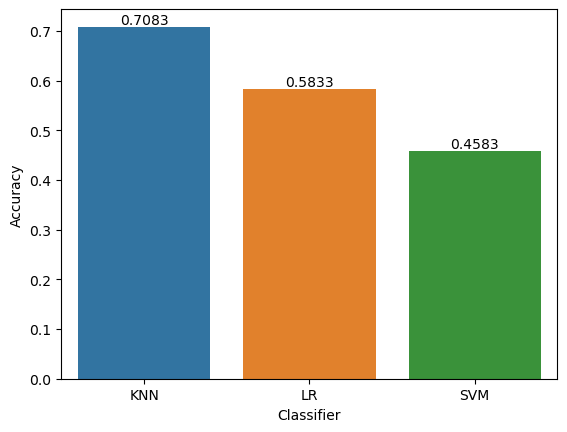

In [62]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")
    
plt.show()